In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

In [2]:
controls = QuantumRegister(2)
circuit = QuantumCircuit(controls)

cx = Operator([
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]
])
circuit.unitary(cx, [0, 1], label='cx')

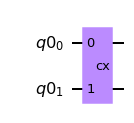

In [3]:
circuit.draw(output='mpl')

In [4]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))